In [186]:
import pandas as pd
import numpy as np
import mysql.connector

In [187]:
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

In [212]:
limit = 1000
output = "ratio_total_per_balance"

df = pd.read_csv('data_invoce_topan.csv')
df = df[:limit]
df["ratio_total_per_balance"] = df["cash_memo_balance_amount"] / df["cash_memo_total_amount"]
df.drop("cash_memo_total_amount", axis=1)

print(df)

train_set, test_set = train_test_split(df, test_size=0.2)

train_labels = train_set[output].copy()
train_features = train_set.drop(output, axis=1)

test_labels = test_set[output].copy()
test_features = test_set.drop(output, axis=1)


     outlet_code  cash_memo_balance_amount  cash_memo_total_amount  \
0          97437                 1894157.0               2049284.0   
1          96858                10404232.0              10404232.0   
2          97492                 4568250.0               4718250.0   
3          97492                 4568250.0               4718250.0   
4          97492                 4568250.0               4718250.0   
5          97492                 4568250.0               4718250.0   
6          97492                 5524853.0               5524853.0   
7          97492                 5524853.0               5524853.0   
8          96787                 2648295.0               2697324.0   
9          96696                 2335810.0               2335810.0   
10         96537                 2645629.0               2645629.0   
11         96787                 1369748.0               1369748.0   
12         96505                 1263671.0               1263671.0   
13         96491    

In [189]:
#df['outlet_code'] = df['outlet_code'].factorize()[0]
#df['ratio_total_per_balance'] = df['cash_memo_balance_amount']/df['cash_memo_total_amount']
#df

In [190]:
"""Make the dataframe smaller and train test split
from sklearn.model_selection import train_test_split

df = df[:limit]
train_set, test_set = train_test_split(df, test_size=0.2, random_state=1)
print(type(train_set))
print(type(df_test))"""

'Make the dataframe smaller and train test split\nfrom sklearn.model_selection import train_test_split\n\ndf = df[:limit]\ntrain_set, test_set = train_test_split(df, test_size=0.2, random_state=1)\nprint(type(train_set))\nprint(type(df_test))'

In [213]:
"""from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attibute_names):
        self.attibute_names = attibute_names
    def fit(self, X, y=None):
        return(self)
    def transform(self, X): 
        return(X[self.attibute_names].values)

#%run CategoricalEncoder.py

cat_attributes = ['outlet_code']
num_attributes = ['DPD','product_price','ratio_total_per_balance']

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
#     ('imputer',Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
    ('label_binarizer',CategoricalEncoder(encoding="onehot-dense")),])

full_pipeline = FeatureUnion(transformer_list=[
    ('cat_pipeline',cat_pipeline),
    ('num_pipeline',num_pipeline),])

df_prepared = full_pipeline.fit_transform(train_set.copy())
df_labels = train_set[output].copy()
df_prepared.shape"""

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
def evaluate(labels, predictions):
    #Begin rms error
    rmse_accuracy = 100 - np.sqrt(mean_squared_error(labels, predictions))/(np.amax(labels) - np.amin(labels)) * 100

    errors = abs(predictions - labels) # this was one way I found in "towards data science" website, we can use the NRMSD 
                                        # to calculate the error. 
    mape = 100 * (errors / test_labels)  # Calculate mean absolute percentage error (MAPE)
    #print(mape)
    mape_accuracy = 100 - np.mean(mape) # Calculate and display accuracy
    plt.plot(labels, predictions)
    plt.show()
    accuracy_grid = {"RMSE": rmse_accuracy, "r2 score /1":r2_score(labels, predictions)}
    return accuracy_grid

In [192]:
#pd.DataFrame(df_prepared)
# df_test = pd.DataFrame(df_test)

In [193]:
"""from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

df_test_labels = test_set[output]

df_test = full_pipeline.transform(test_set)

predictions = lin_reg.predict(df_test)

print(str(evaluate(df_test_labels, predictions)) + ' normalized percent error')
compare = {'predicted':list(predictions),'examples':list(df_test_labels)}
pd.DataFrame(compare)
"""


"from sklearn.linear_model import LinearRegression\n\nlin_reg = LinearRegression()\nlin_reg.fit(df_prepared, df_labels)\n\ndf_test_labels = test_set[output]\n\ndf_test = full_pipeline.transform(test_set)\n\npredictions = lin_reg.predict(df_test)\n\nprint(str(evaluate(df_test_labels, predictions)) + ' normalized percent error')\ncompare = {'predicted':list(predictions),'examples':list(df_test_labels)}\npd.DataFrame(compare)\n"

In [215]:
"""https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 """

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

def RandomCVTuningRandomForest(train_features, train_labels):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 600, stop = 1600, num = 3)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(train_features, train_labels)
    print(rf_random.best_params_)
    return rf_random.best_estimator_

Predictor = RandomCVTuningRandomForest(train_features, train_labels)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.3s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.8s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=600,

[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=   6.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=   6.6s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=   6.3s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=   5.6s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=

[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   5.7s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   5.4s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   5.6s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.7s
[CV] n_estimators=1

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, total=   3.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, total=   3.3s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, total=   3.7s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=600, m

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.7min finished


{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


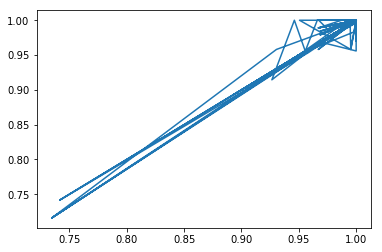

{'RMSE': 96.356745066585162, 'r2 score /1': 0.95271131481247318}


In [216]:
#print(Predictor.predict(test_features))
print(evaluate(test_labels, Predictor.predict(test_features)))